# 1，模型优化

In [1]:
#2维线性规划问题
from scipy.optimize import linprog
c=[1,-4]#默认取最小值，如果想要得到最大值，只需取反[-1,4]就能得到最大值的相反数
A=[[-3,1],[1,2]]
b=[6,4]
x0_bounds=(None,None)
x1_bounds=(-3,None)
res=linprog(c,A_ub=A,b_ub=b,bounds=(x0_bounds,x1_bounds),options={"disp":True})
print(res)

Optimization terminated successfully.
         Current function value: -11.428571  
         Iterations: 2
     fun: -11.428571428571429
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0.,  0.])
  status: 0
 success: True
       x: array([-1.14285714,  2.57142857])


In [2]:
#最小二乘多项式曲线拟合
import numpy as np
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 30)#得到一条最高次幂为30的拟合曲线，如结果所示，第一个数值-7.16028404e-22为30次幂的系数，以此类推。
print(z)
#给31个数加上次数
p30=np.poly1d(np.polyfit(x,y,30))
print(p30(4))#当x=4时，此时y的值

[ -7.16028404e-22  -3.53244996e-21  -1.73643682e-20  -8.49616988e-20
  -4.13196126e-19  -1.99351629e-18  -9.51562313e-18  -4.47612634e-17
  -2.06266909e-16  -9.22264291e-16  -3.93423954e-15  -1.54779639e-14
  -5.15043682e-14  -9.84336459e-14   4.79579339e-13   8.28266124e-12
   7.66157327e-11   5.89919299e-10   4.13252699e-09   2.71435971e-08
   1.68688753e-07   9.87879705e-07   5.34617723e-06   2.53921341e-05
   8.97230082e-05   2.24930460e-05  -3.51987939e-03  -3.95749282e-02
  -2.12411048e-01   1.05536171e+00   1.40506462e-15]
-0.8


C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


C:\Users\Administrator\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


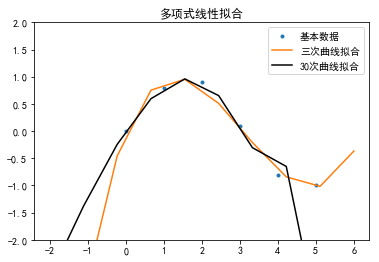

In [3]:
#多项式拟合包括3次和30次
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#生成基本数据x，y
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
xp=np.linspace(-2,6,10)
p=np.poly1d(np.polyfit(x,y,3))#最高次幂为3次
p30=np.poly1d(np.polyfit(x,y,30))#最高次幂为30次
plt.ylim(-2,2)
plt.title("多项式线性拟合")
plt.plot(x,y,'.',xp,p(xp),'-',xp,p30(xp),'k-')
plt.legend(loc="best",labels=["基本数据","三次曲线拟合","30次曲线拟合"])#分别对应的加上了legend
plt.show()

In [18]:
#多元线性回归拟合
import pandas as pd
import numpy as np
import statsmodels.api as sm
data=pd.read_excel("./数学建模/源数据/data.xls")
X=data[['农民受教育程度','城乡收入差距','家庭负担']]
y=data['播种面积']
X=sm.add_constant(X)
est=sm.OLS(y,X).fit()
print(est.summary())
hy=[("农民受教育程度=0"),("城乡收入差距=0"),("家庭负担=0")]#相当于对整体回归方程的假设检验
est.f_test(hy)

                            OLS Regression Results                            
Dep. Variable:                   播种面积   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     6.261
Date:                Fri, 22 Sep 2017   Prob (F-statistic):             0.0281
Time:                        11:30:28   Log-Likelihood:                -6.5709
No. Observations:                  10   AIC:                             21.14
Df Residuals:                       6   BIC:                             22.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9043      7.594      0.251      0.8

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 6.26054305]]), p=0.028075300340344427, df_denom=6, df_num=3>

# 2，画图

In [ ]:
#加上legend图像说明
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#生成数据
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2

plt.figure()
#set x limits
plt.xlim((-1, 2))
plt.ylim((-2, 3))

# 设置新的x轴标签
new_sticks = np.linspace(-1, 2, 5)
plt.xticks(new_sticks)
# 设置新的y轴标签
plt.yticks([-2, -1.8, -1, 1.22, 3],
           [r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])
# 设置线的风格
l1, = plt.plot(x, y2, label='linear line')
l2, = plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--', label='square line')
plt.legend(loc="best",bbox_to_anchor=(1,1),fancybox=True,shadow=True)
#也可以重新图像说明设置
#plt.legend(handles=[l1,l2], labels=['up','down'],  loc='best')

In [ ]:
#加annotion标签,文本
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 50)#数据输入
y = 2*x + 1#

plt.figure(num=1, figsize=(8, 5),)
plt.plot(x, y,label="加上标签，文本")

ax = plt.gca()#获取当前坐标轴信息
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

x0 = 1
y0 = 2*x0 + 1
plt.plot([x0, x0,], [0, y0,], 'k--', linewidth=2.5)
plt.scatter([x0, ], [y0, ], s=50, color='b')

#黑色字体:
plt.annotate(r'$2x+1=%s$' % y0, xy=(x0, y0), xycoords='data', xytext=(+30, -30),
             textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2"))

#红色字体:
plt.text(-3.7, 3, r'$This\ is\ the\ some\ text. \mu\ \sigma_i\ \alpha_t$',
         fontdict={'size': 16, 'color': 'r'})
plt.legend(loc=8)
plt.show()

In [ ]:
#设置坐标轴
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2

plt.figure()
plt.plot(x, y2)
# plot the second curve in this figure with certain parameters
plt.plot(x, y1, color='red', linewidth=1.0, linestyle='--')
# set x limits
plt.xlim((-1, 2))
plt.ylim((-2, 3))

# set new ticks
new_ticks = np.linspace(-1, 2, 5)
plt.xticks(new_ticks)
# set tick labels
plt.yticks([-2, -1.8, -1, 1.22, 3],
           ['$really\ bad$', '$bad$', '$normal$', '$good$', '$really\ good$'])
# to use '$ $' for math text and nice looking, e.g. '$\pi$'

# gca = 'get current axis'
ax = plt.gca()#获取当前坐标轴信息
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')#标签位置
# ACCEPTS: [ 'top' | 'bottom' | 'both' | 'default' | 'none' ]

ax.spines['bottom'].set_position(('data', 0))#让x轴贴近曲线的底部
# the 1st is in 'outward' | 'axes' | 'data'
# axes: percentage of y axis
# data: depend on y data

ax.yaxis.set_ticks_position('left')#标签位置
# ACCEPTS: [ 'left' | 'right' | 'both' | 'default' | 'none' ]

ax.spines['left'].set_position(('data',0))#让y轴移到曲线的x轴与曲线的交接点
plt.show()

In [ ]:
#设对象的能见度，防止多图重合
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 50)
y = 0.1*x

plt.figure()
plt.plot(x, y, linewidth=5)
plt.ylim(-2, 2)
ax = plt.gca()
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))#将x坐标轴上移到y=0的位置
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))#将y坐标轴上移到x=0的位置
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    label.set_bbox(dict(facecolor='red', edgecolor='None', alpha=0.5))
plt.show()

In [ ]:
#Scatter 散点图
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

n = 1024    # data size
X = np.random.normal(0, 1, n) # 每一个点的X值
Y = np.random.normal(0, 1, n) # 每一个点的Y值
T = np.arctan2(Y,X) # for color value
plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())  # ignore xticks
plt.ylim(-1.5, 1.5)
plt.yticks(())  # ignore yticks

plt.show()

In [ ]:
#柱状图
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
n=12
X=np.arange(n)
Y1=(1-X/float(n))*np.random.uniform(0.5,1,n)
Y2=(1-X/float(n))*np.random.uniform(0.5,1,n)
plt.bar(X,+Y1,facecolor="#9999ff",edgecolor="white")
#在柱状图上面加数字
for x,y in zip(X,Y1):
    #ha:水平对齐，va:垂直对齐
    plt.text(x,y+0.03,"%.2f" % y,ha="center",va="bottom")
plt.bar(X,-Y2,facecolor="#ff9999",edgecolor="white")
for x,y in zip(X,Y2):
    #ha:水平对齐，va:垂直对齐
    plt.text(x,-y-0.03,"%.2f" % y,ha="center",va="top")#记得是-y
plt.ylim(-1.3,1.3)
plt.yticks(())#隐藏轴标签
plt.xticks(())#隐藏轴标签
plt.show()

In [ ]:
#画等高线(需要三个坐标轴)
import matplotlib.pyplot as plt
%matplotlib inline
def Z(x,y):
    #计算每个坐标点的高度
    return(x+y)*np.exp(1+x*y)
n=256
x=np.linspace(-1,1,n)
y=np.linspace(-1,1,n)
X,Y=np.meshgrid(x,y)#将数据点打包成网格点
#定义颜色
plt.contourf(X,Y,Z(X,Y),8,alpha=.75,cmap=plt.cm.hot)#8为分成10部分，8个圈
#画等高线
C=plt.contour(X,Y,Z(X,Y),8,colors="black",linewidth=.5)
#画上高度标签
plt.clabel(C,inline=True,fontsize=10)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#如何将数组文件打印成图像
import matplotlib.pyplot as plt
import numpy as np
a=np.array(np.random.uniform(-1,1,9)).reshape((3,3))
plt.imshow(a,interpolation="nearest",cmap="bone",origin="upper")#origin=upper表明像素展示顺序与图像一致,反过来的话就是lower
plt.colorbar(shrink=0.9)#右边增加颜色标注,标注大小压缩到90%的大小。

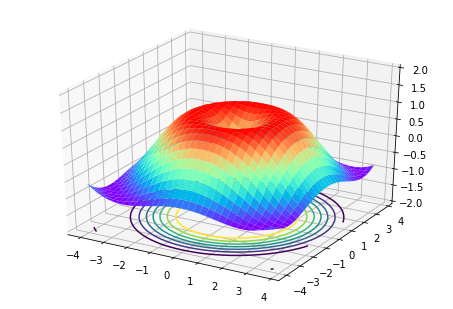

In [72]:
#如何画3D图像
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D#一定要加载这个3D包
x=np.arange(-4,4,0.25)
y=np.arange(-4,4,0.25)
X,Y=np.meshgrid(x,y)#一定要先打包成网格点再去求高度值
R=np.sqrt(X**2+Y**2);Z=np.sin(R)#设置高度值
fig=plt.figure()
ax=Axes3D(fig)
#画3D图
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap="rainbow")#rstride,cstride为网格密度
#画等高线（投影部分）
ax.contour(X,Y,Z,zdir="Z",offset=-2)#zdir为投射到那一块平面上，这里设置为z平面，offset为投射距离，设置为z=-2的距离
ax.set_zlim(-2,2)#设置z坐标轴的范围
plt.show()

# 3维曲线拟合

[ -2.7787887   15.31440666] -453.920419001


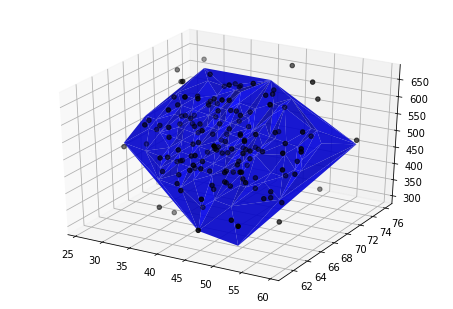

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import scale
sample = pd.read_csv("F:/desktop/Lung Function.csv")
col=['ffvc','age of father','height of father in inches']
#data=pd.DataFrame(scale(sample[col]),columns=col)#标准化
data=pd.DataFrame(sample[col],columns=col)#标准化
# x = np.array(sample['age of father'])
# y = np.array(sample['height of father in inches'])
# z = np.array(sample['ffvc'])
Z = data['ffvc']
x = data['age of father']
y = data['height of father in inches']
x1 = pd.concat([x,y],axis=1)
x=np.array(x)
y=np.array(y)
regr = linear_model.LinearRegression()
r=regr.fit(x1, Z)
a, b = regr.coef_, regr.intercept_
print(a,b)
fig = plt.figure()
ax=Axes3D(fig)
ax.plot_trisurf(x.flatten(), y.flatten(), r.predict(x1).flatten(),alpha=0.9,color='b',)
ax.scatter(x,y,Z,c='k')
plt.show()


In [ ]:
#多个图合并显示
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.figure()
plt.subplot(211)
plt.plot(np.arange(1,5,0.5),np.arange(1,5,0.5)**2)

plt.subplot(234)#记得这里是从234开始，第二行三列第一个序号为4，以此类推
plt.plot(np.arange(1,5,0.5),np.arange(1,5,0.5)**3)

plt.subplot(235)
plt.plot(np.arange(1,5,0.5),np.arange(1,5,0.5)**4)

plt.subplot(236)
plt.plot(np.arange(1,5,0.5),np.arange(1,5,0.5)**5)

In [ ]:
#用matplotlib制作动画
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
fig,ax=plt.subplots()
x=np.arange(0,2*np.pi,0.01)
line,=ax.plot(x,np.sin(x))
def animate(i):
    line.set_ydata(np.sin(x+i/1000))
    return line,
def init():
    line.set_ydata(np.sin(x))
    return line,
ani=animation.FuncAnimation(fig=fig,func=animate,init_func=init,frames=1000,interval=10,blit=False)
plt.show()

# 3，建模

* 数据预处理（插值、标准化）
* 聚类
* svm
* bp神经网络
* 多元线性回归预测
* 遗传算法

In [19]:
#coding=utf-8  
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale#标准化
#from sklearn.decomposition import PCA#降维
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_excel('./数学建模/源数据/data.xls',index_col='时间')#原先用csv格式导入没用，用xlsx竟然可以了

col=data.columns
index=data.index

#标准化x~N(0,1)
data_scaled=scale(data,axis=0)
data_scaled=pd.DataFrame(data_scaled,columns=col,index=index)
print(data_scaled.mean(axis=0))#每一个变量接近于0
print(data_scaled.std(axis=0))#每一个变量接近于1
#print(data_scaled)
# covMat=np.cov(data_scaled.values,rowvar=0)#协方差矩阵
# covMat.shape
# eigVals,eigVects=np.linalg.eig(np.mat(covMat))#求特征值，特征向量
# data1=pd.DataFrame(eigVects,index=col)
# data1["特征值"]=eigVals#特征值
# #计算贡献率
# a=list()
# for i in eigVals:
#     y=i/eigVals.sum()
#     a.append(y)
# #计算累计贡献率
# b=list()
# y1=0
# for i in eigVals:
#     y=i/eigVals.sum()
#     y1+=y
#     b.append(y1)

农业劳动人口（万人）      1.709743e-15
出口量（吨）          9.020562e-18
进口量（吨）         -4.440892e-17
农民受教育程度        -3.996803e-16
城乡收入差距         -2.664535e-16
家庭负担           -8.437695e-16
农资价格（上年=100）    1.720846e-15
农机总动力（万千瓦）     -2.442491e-16
上年粮粮食收购价       -1.776357e-16
工业生产总值         -3.108624e-16
城市区域面积          3.108624e-16
播种面积           -8.881784e-17
dtype: float64
农业劳动人口（万人）      1.054093
出口量（吨）          1.054093
进口量（吨）          1.054093
农民受教育程度         1.054093
城乡收入差距          1.054093
家庭负担            1.054093
农资价格（上年=100）    1.054093
农机总动力（万千瓦）      1.054093
上年粮粮食收购价        1.054093
工业生产总值          1.054093
城市区域面积          1.054093
播种面积            1.054093
dtype: float64


## 2，插值拟合（拉格朗日）

In [ ]:
import matplotlib.pyplot as plt   
%matplotlib inline
from scipy.interpolate import lagrange
sr_x = [i for i in range(-50, 50, 10)]
sr_fx = [i**2 for i in sr_x]

Lx = lagrange(sr_x, sr_fx)            # 获得插值函数
tmp_x = [i for i in range(-50, 50)]     # 测试用例
tmp_y = [Lx(i) for i in tmp_x]          # 根据插值函数获得测试用例的纵坐标

''' 画图 '''
plt.figure("play")
ax1 = plt.subplot(111)
plt.sca(ax1)
plt.plot(sr_x, sr_fx, linestyle = ' ', marker='o', color='b')
plt.plot(tmp_x, tmp_y, linestyle = '--', color='r')
plt.show()
#tmp_y

# 二维插值，三维展示

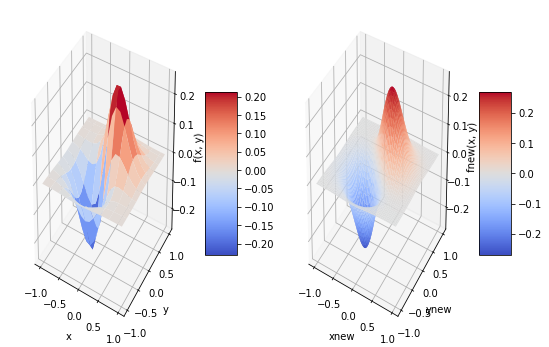

In [1]:
import numpy as np  
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib as mpl  
%matplotlib inline
from scipy import interpolate  
import matplotlib.cm as cm  
import matplotlib.pyplot as plt  
  
def func(x, y):  
    return (x+y)*np.exp(-5.0*(x**2 + y**2))  
  
# X-Y轴分为20*20的网格  
x = np.linspace(-1, 1, 20)  
y = np.linspace(-1,1,20)  
x, y = np.meshgrid(x, y)#20*20的网格数据  
  
fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值  
  
fig = plt.figure(figsize=(9, 6))  
#Draw sub-graph1  
ax=plt.subplot(1, 2, 1,projection = '3d')  
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)  
ax.set_xlabel('x')  
ax.set_ylabel('y')  
ax.set_zlabel('f(x, y)')  
plt.colorbar(surf, shrink=0.5, aspect=5)#标注  
  
#二维插值  
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')#newfunc为一个函数  
  
# 计算100*100的网格上的插值  
xnew = np.linspace(-1,1,100)#x  
ynew = np.linspace(-1,1,100)#y  
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值  np.shape(fnew) is 100*100  
xnew, ynew = np.meshgrid(xnew, ynew)  
ax2=plt.subplot(1, 2, 2,projection = '3d')  
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=cm.coolwarm,linewidth=0.5, antialiased=True)  
ax2.set_xlabel('xnew')  
ax2.set_ylabel('ynew')  
ax2.set_zlabel('fnew(x, y)')  
plt.colorbar(surf2, shrink=0.5, aspect=5)#标注  
  
plt.show()  

# 回归预测

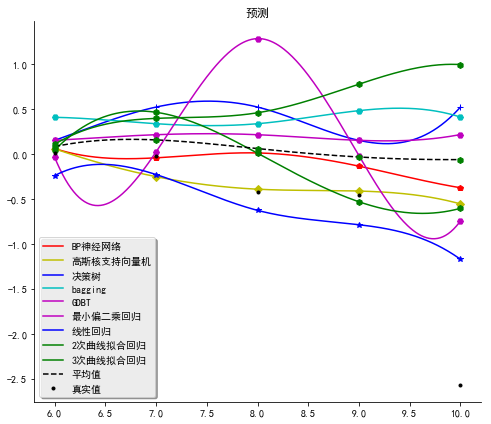

R2 0.104842953114
均方误差（MSE）  0.8171523728
可解释性方差  0.263006095067


In [20]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import neural_network  
from sklearn.svm import SVR  
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,scale
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from scipy.interpolate import spline  
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(8,7)#设置图例大小
data=pd.read_excel("./数学建模/源数据/data.xls",index_col=0)
data=pd.DataFrame(scale(data))#标准化
i=5#前五项训练
X_train=data.iloc[:i,:-1]
Y_train=data.iloc[:i,-1]
X_test=data.iloc[i:,:-1]
Y_test=data.iloc[i:,-1]
MLP=neural_network.MLPRegressor()  
svm=SVR(kernel='linear')
tree=ExtraTreeRegressor()
bagging=BaggingRegressor()
GDBT=GradientBoostingRegressor()
RF=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
LR=LinearRegression()
PLS=PLSRegression(scale=True)#最小偏二乘回归，保留2个主成分
T = np.array([6, 7, 8, 9, 10])
xnew = np.linspace(T.min(),T.max(),300)

ax = plt.gca()
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')

MLP.fit(X_train,Y_train)
y_pred=MLP.predict(X_test)
power_smooth = spline(T,y_pred,xnew) 
plt.plot(xnew,power_smooth,'r-',label="BP神经网络")
plt.plot(T,y_pred,"rp")

svm.fit(X_train,Y_train)
y_pred1=svm.predict(X_test)
power_smooth = spline(T,y_pred1,xnew) 
plt.plot(xnew,power_smooth,'y-',label="高斯核支持向量机")
plt.plot(T,y_pred1,"yD")

tree.fit(X_train,Y_train)
y_pred2=tree.predict(X_test)
power_smooth = spline(T,y_pred2,xnew) 
plt.plot(xnew,power_smooth,'b-',label="决策树")
plt.plot(T,y_pred2,"b+")

bagging.fit(X_train,Y_train)
y_pred3=bagging.predict(X_test)
power_smooth = spline(T,y_pred3,xnew) 
plt.plot(xnew,power_smooth,'c-',label="bagging")
plt.plot(T,y_pred3,"cH")

GDBT.fit(X_train,Y_train)
y_pred4=GDBT.predict(X_test)
power_smooth = spline(T,y_pred4,xnew) 
plt.plot(xnew,power_smooth,'m-',label="GDBT")
plt.plot(T,y_pred4,"mH")

# RF.fit(X_train,Y_train)
# y_pred5=RF.predict(X_test)
# power_smooth = spline(T,y_pred5,xnew) 
# plt.plot(xnew,power_smooth,'c-',label="随机森林")
# plt.plot(T,y_pred5,"cH")

# AdaBoost.fit(X_train,Y_train)
# y_pred6=AdaBoost.predict(X_test)
# power_smooth = spline(T,y_pred6,xnew) 
# plt.plot(xnew,power_smooth,'c-',label="AdaBoost")
# plt.plot(T,y_pred6,"cH")

PLS.fit(X_train,Y_train)
y_pred_n=PLS.predict(X_test)
power_smooth = spline(T,y_pred_n,xnew) 
plt.plot(xnew,power_smooth/100,'m-',label="最小偏二乘回归")
plt.plot(T,y_pred_n/100,"mH")

LR.fit(X_train,Y_train)
y_pred7=LR.predict(X_test)
power_smooth = spline(T,y_pred7,xnew) 
plt.plot(xnew,power_smooth,'b-',label="线性回归")
plt.plot(T,y_pred7,"b*")

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic1 = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic1 = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic1, Y_train)
y_pred8=regressor_quadratic.predict(X_test_quadratic1)
power_smooth = spline(T,y_pred8,xnew) 
plt.plot(xnew,power_smooth,'g-',label="2次曲线拟合回归")
plt.plot(T,y_pred8,"gh")

quadratic_featurizer = PolynomialFeatures(degree=3)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, Y_train)
y_pred9=regressor_quadratic.predict(X_test_quadratic)
power_smooth = spline(T,y_pred9,xnew) 
plt.plot(xnew,power_smooth,'g-',label="3次曲线拟合回归")
plt.plot(T,y_pred9,"gh")

power_smooth = spline(T,(y_pred+y_pred1+y_pred2+y_pred3+y_pred4+y_pred7+y_pred8+y_pred9)/9,xnew) 
plt.plot(xnew,power_smooth,'k--',label="平均值")
plt.plot(T,(y_pred+y_pred1+y_pred2+y_pred3+y_pred4+y_pred7+y_pred8+y_pred9)/9,"gh")

plt.title("预测")
plt.plot(T,Y_test,'k.',label="真实值")
# plt.legend(loc="best",bbox_to_anchor=(1,1),fancybox=True,shadow=True)
plt.legend(loc="best",fancybox=True,shadow=True)
plt.savefig("f:/desktop/预测.jpeg",dpi=1000)#一定要放在plt.show()的前面，不然会一面空白
plt.show()
print('R2' ,r2_score(Y_test,y_pred1))
print('均方误差（MSE） ' ,mean_squared_error(Y_test,y_pred1))
print('可解释性方差 ' ,explained_variance_score(Y_test,y_pred1))

# 拉格朗日插值填充缺失值

In [21]:
#coding=utf-8
import warnings
warnings.filterwarnings("ignore")
import pandas as pd  
from scipy.interpolate import lagrange#拉格朗日函数  
data=pd.read_excel('./数学建模/源数据/data.xls')
# data=data.reset_index(drop=True) 
print(data)
#自定义列向量插值函数  
def ploy(s,n,k=6):  
    y=s[list(range(n-k,n))+list(range(n+1,n+1+k))]#取数  
    y=y[y.notnull()]  
    return lagrange(y.index,list(y))(n)  
for i in data.columns:  
    for j in range(len(data)):  
        if(data[i].isnull())[j]:  
            data[i][j]=ploy(data[i],j)  
print(data)

     时间  农业劳动人口（万人）      出口量（吨）      进口量（吨）  农民受教育程度  城乡收入差距     家庭负担  \
0  2014        5462      957.47  2971249.10     0.06    6814  7962.20   
1  2013        5482     2520.00  5506711.30     0.07    7824  6877.30   
2  2012        5559        0.10  3688616.30     0.07    9279  6776.05   
3  2011        5646    39794.25  1248822.10     0.07   10664  5900.57   
4  2010        5698        1.17  1218722.70     0.07   11692  4807.18   
5  2009        5902     8400.12   893709.83     0.07   12955  4417.18   
6  2008        5860   125949.13    31873.45     0.07   14450  4077.05   
7  2007        5909  2336620.00    83424.75     0.07   16310  3621.60   
8  2006        6055    11482.20   584094.92     0.00   17644  3143.80   
9  2005        6066   260264.50  3510133.20     0.07   17340  2735.80   

   农资价格（上年=100）  农机总动力（万千瓦）  上年粮粮食收购价      工业生产总值    城市区域面积    播种面积  
0        101.18       13101       118   35387.430  84963.72  1.1695  
1        103.00       12739       112   43900.210  83739

# 源数据异常值检验（误差分析）

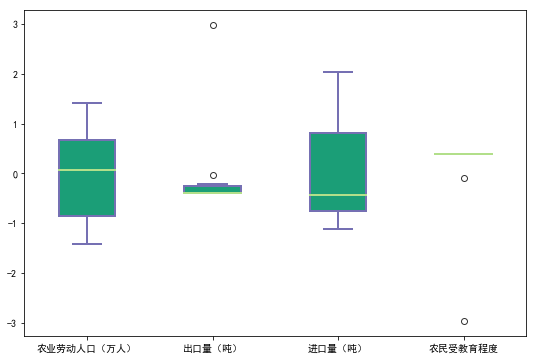

In [22]:
import numpy as np 
import matplotlib as mpl 
mpl.use('agg')
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale 
from matplotlib.pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
data=pd.read_excel("./数学建模/源数据/data.xls",index_col='时间')
col=data.columns
data=pd.DataFrame(scale(data),columns=col)
x1=data["农业劳动人口（万人）"]
x2=data["出口量（吨）"]
x3=data["进口量（吨）"]
x4=data["农民受教育程度"]

data_to_plot = [x1, x2, x3, x4]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot, patch_artist=True)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.8)

## Custom x-axis labels
ax.set_xticklabels(["农业劳动人口（万人）", "出口量（吨）", "进口量（吨）", "农民受教育程度"])

## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
#plt.savefig("f:/desktop/误差分析.jpg",dpi=600)#暂时不用保存

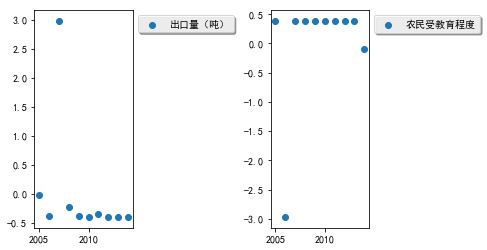

In [23]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib.pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
data=pd.read_excel("./数学建模/源数据/data.xls",index_col='时间')
col=data.columns
i=data.index
data=pd.DataFrame(scale(data),columns=col)
plt.figure()
plt.subplot(131)#subplot不是subplots
plt.scatter(i,data['出口量（吨）'],label="出口量（吨）")
plt.legend(bbox_to_anchor=(1,1),fancybox=True,shadow=True)
plt.subplot(133)
plt.scatter(i,data["农民受教育程度"],label="农民受教育程度")
plt.legend(bbox_to_anchor=(1,1),fancybox=True,shadow=True)
plt.show()

In [24]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
data=pd.read_excel('f:/desktop/数学建模/源数据/data.xls')
print(data.head())
md = smf.mixedlm("播种面积~上年粮粮食收购价+家庭负担",data,groups=data["城乡收入差距"])#中文括号不能识别
mdf = md.fit()
print(mdf.summary())

     时间  农业劳动人口（万人）    出口量（吨）     进口量（吨）  农民受教育程度  城乡收入差距     家庭负担  \
0  2014        5462    957.47  2971249.1     0.06    6814  7962.20   
1  2013        5482   2520.00  5506711.3     0.07    7824  6877.30   
2  2012        5559      0.10  3688616.3     0.07    9279  6776.05   
3  2011        5646  39794.25  1248822.1     0.07   10664  5900.57   
4  2010        5698      1.17  1218722.7     0.07   11692  4807.18   

   农资价格（上年=100）  农机总动力（万千瓦）  上年粮粮食收购价    工业生产总值    城市区域面积    播种面积  
0        101.18       13101       118  35387.43  84963.72  1.1695  
1        103.00       12739       112  43900.21  83739.42  0.8450  
2        105.90       12419       102  54428.27  83994.90  0.6289  
3        111.10       12098        95  62958.53  83999.40  0.4937  
4        103.00       11628        90  71209.42  83026.94  0.1424  
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: 播种面积    
No. Observations: 10      Method:             REML    
No. Groups:    

In [40]:
#相关性分析
import pandas as pd
from scipy.stats import pearsonr
data=pd.read_excel('./数学建模/源数据/data.xls')
col=data.columns
col0=col[0:4].values
col1=col[4:8].values
print(data['上年粮粮食收购价'].corr(data['工业生产总值']))
print(pearsonr(data['上年粮粮食收购价'],(data['工业生产总值'])))#第一个相关系数的大小，第二个是p值

-0.953079008079
(-0.95307900807879931, 2.0034627216943854e-05)


# 混合线性模型

In [56]:
#混合线性模型
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
import pandas as pd
data=pd.read_excel('./数学建模/数模数据/data.xls')
md = smf.mixedlm("播种面积~上年粮粮食收购价+家庭负担",data,groups=data['农业劳动人口（万人）'])#中文括号不能识别，将S变量当做随机效应
mdf = md.fit()
A = np.identity(len(mdf.params))
print( A[1:,:])
print(mdf.params)
print(mdf.summary())

print(mdf.f_test(['家庭负担']))#限制条件为家庭负担=0
print(mdf.fe_params)#固定效应系数
print(mdf.bse_re)#拟合随机效应的标准误差

print(mdf.wald_test(A[1:,:]))#wald检验

[[ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
Intercept   -0.111334
上年粮粮食收购价    -0.054554
家庭负担         0.000995
groups RE    1.000000
dtype: float64
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: 播种面积    
No. Observations: 10      Method:             REML    
No. Groups:       10      Scale:              0.1554  
Min. group size:  1       Likelihood:         -17.9361
Max. group size:  1       Converged:          Yes     
Mean group size:  1.0                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   -0.111    0.247 -0.451 0.652 -0.596  0.373
上年粮粮食收购价    -0.055    0.007 -7.507 0.000 -0.069 -0.040
家庭负担         0.001    0.000  5.856 0.000  0.001  0.001
groups RE    0.155                                    

<F test: F=array([[ 34.29688334]]), p=0.0006265477779676847, df_denom=7, df_n

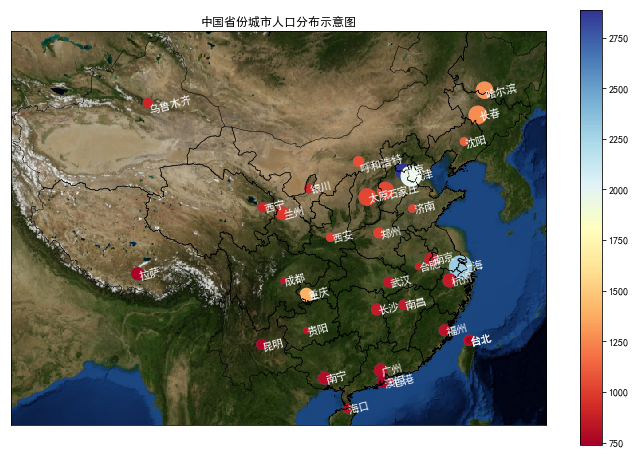

In [51]:
import numpy as np
import matplotlib
matplotlib.rcParams['toolbar'] = 'None'
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from  matplotlib.animation import FuncAnimation
import pandas as pd
from matplotlib.pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
fig=plt.figure(figsize=(12,8))
city_names = []
lats  = []
lons  = []
pops  = []
for line in open("./数学建模/basemap/text.txt"):
    info = line.split()
    city_names.append(info[0])
    lon  = float(info[1][:-1])
    if info[1][-1] == 'S': lon = -lon
    lons.append(lon)
    lat  = float(info[2][:-1])
    if info[2][-1] == 'W': lat = -lat + 360.0
    lats.append(lat)
#颜色代码

posi=pd.read_excel("./数学建模/basemap/2015Cities-CHINA.xlsx")


lat = np.array(posi["lat"][0:120])                        # 获取维度之维度值
lon = np.array(posi["lon"][0:120])                        # 获取经度值
pop = np.array(posi["pop"][0:120],dtype=float)    # 获取人口数，转化为numpy浮点型
gdp = np.array(posi["GDP"][0:120],dtype=float)    # 获取人口数，转化为numpy浮点型

size=(gdp/np.max(gdp))*500 
map = Basemap(projection='lcc',height=100,width=10,
              lat_0=35, lon_0=110,
              llcrnrlon=82.33, 
              llcrnrlat=15.01, 
              urcrnrlon=135.16, 
              urcrnrlat=49.123,resolution='l',area_thresh=20000,rsphere=6371200.)

map.drawcounties()
map.readshapefile("./数学建模/basemap/CHN_adm1",'states',drawbounds=True,linewidth=0.5,color='k')
# parallels = np.arange(10.,90,10.) 
# map.drawparallels(parallels,labels=[1,0,0,0],fontsize=4) # 绘制纬线

# meridians = np.arange(88.,140.,10.)
# map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=4) # 绘制经线


x,y = map(lons,lats)
map.bluemarble()
# map.scatter(x,y,edgecolors='r',facecolors='r',marker='o',s=size+100,)
map.scatter(x,y,marker='o',s=size,)
#map.scatter(x,y,facecolors='r',s=size)
plt.title("中国省份城市人口分布示意图")
#size_factor = 80.0
y_offset    = 30
rotation    = 15
#for i,j,k,name in zip(x,y,pops,names):
for i,j,name in zip(x,y,city_names):
    #cs = map.scatter(i,j,s=size,marker='o',color='#FF5600')
    #cs = map.scatter(i,j,s=size,marker='D',color='r')
    plt.text(i,j+y_offset,name,rotation=rotation,fontsize=11,color='w')
cm = plt.cm.get_cmap('RdYlBu')
# color_depth = (pop/np.max(pop))*254.9
# for i in color_depth:
#     k=int(i)
#     pops.append(k)
sc=plt.scatter(x,y,c=pop[:35],cmap=cm,marker='o',s=size)
plt.colorbar(sc)
#plt.savefig("F:/desktop/中国地图.jpg",dpi=600)
plt.show()

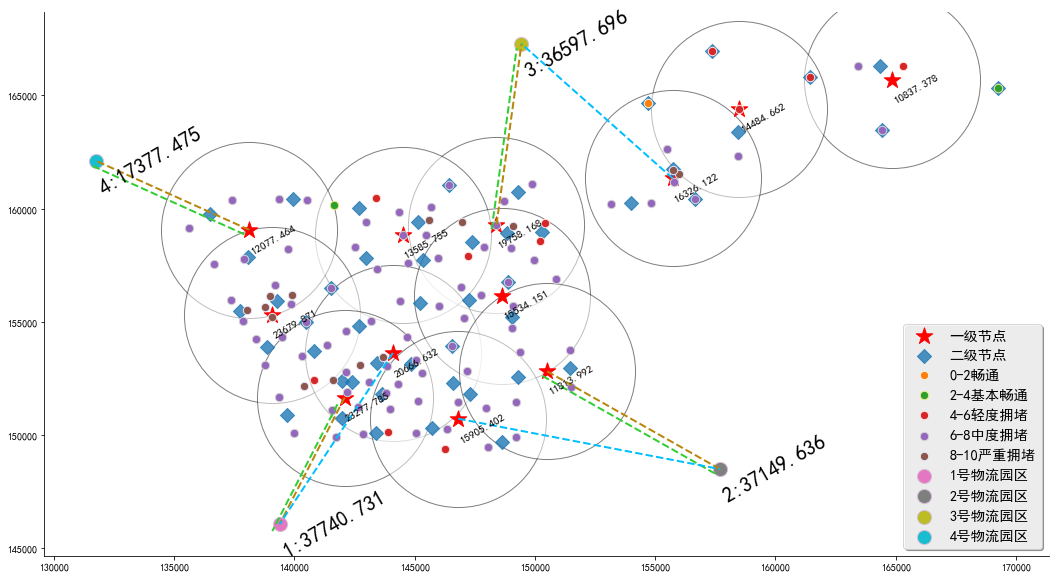

In [50]:
#坐标轴的2维聚类分析
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
fig=plt.figure(figsize=(18,10))
cm = plt.cm.get_cmap('RdYlBu')
data1=pd.read_excel("./数学建模/数模数据/gg.xlsx",index_col=0)
data_1=pd.read_excel("./数学建模/数模数据/一级节点.xlsx")
data_2=pd.read_excel("./数学建模/数模数据/二级节点.xlsx")
x1=data1[data1["离散化"]==1]["x轴"]
y1=data1[data1["离散化"]==1]["y轴"]

x2=data1[data1["离散化"]==2]["x轴"]
y2=data1[data1["离散化"]==2]["y轴"]

x3=data1[data1["离散化"]==3]["x轴"]
y3=data1[data1["离散化"]==3]["y轴"]

x4=data1[data1["离散化"]==4]["x轴"]
y4=data1[data1["离散化"]==4]["y轴"]

x5=data1[data1["离散化"]==5]["x轴"]
y5=data1[data1["离散化"]==5]["y轴"]

ax = plt.gca()
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')

plt.scatter(data_1["x轴"],data_1["y轴"],facecolors='w',edgecolors='k',s=31000,alpha=0.5)#大圈圈
l2=plt.scatter(data_1["x轴"],data_1["y轴"],facecolors='r',edgecolors='r',marker='*',s=300,label="一级节点")#一级点
for i,j,name in zip(data_1["x轴"],data_1["y轴"],data_1["货运量"]):
    plt.text(i,j+30,name,rotation=30,fontsize=11,color='k')
l3=plt.scatter(data_2["x轴"],data_2["y轴"],marker="D",s=100,alpha=0.8,label="二级节点")#二级点
l4=plt.scatter(x1,y1,s=70,alpha=1,edgecolors='beige',label="0-2畅通")#0-2畅通
l5=plt.scatter(x2,y2,s=70,alpha=1,edgecolors='khaki',label="2-4基本畅通")#2-4基本畅通
l6=plt.scatter(x3,y3,s=70,alpha=1,edgecolors='mistyrose',label="4-6轻度拥堵")#4-6轻度拥堵
l7=plt.scatter(x4,y4,s=70,alpha=1,edgecolors='lightgray',label="6-8中度拥堵")#6-8中度拥堵
l8=plt.scatter(x5,y5,s=70,alpha=1,edgecolors='lavender',label="8-10严重拥堵")#8-10严重拥堵

l9=plt.scatter(139382.3437,146047.0951,s=200,alpha=1,edgecolors='thistle',label="1号物流园区")#1物流园区
plt.text(139382.3437,146047.0951+1000,"1:37740.731",rotation=30,fontsize=21,color='k')

l10=plt.scatter(157688.4185,148489.031,s=200,alpha=1,edgecolors='thistle',label="2号物流园区")#2物流园区
plt.text(157688.4185,148489.031+1000,"2:37149.636",rotation=30,fontsize=21,color='k')

l11=plt.scatter(149441.1622,167278.6394,s=200,alpha=1,edgecolors='thistle',label="3号物流园区")#3物流园区
plt.text(149441.1622,167278.6394+1000,"3:36597.696",rotation=30,fontsize=21,color='k')

l12=plt.scatter(131764.713,162103.0925,s=200,alpha=1,edgecolors='thistle',label="4号物流园区")#4物流园区
plt.text(131764.713,162103.0925+1000,"4:17377.475",rotation=30,fontsize=21,color='k')#若画一个标注，则最好标注字符串前面不加关键字
# plt.scatter(148401,159292,marker="D",s=1000)
i=200
#三号物流园区与两个最近第一节点相连接
plt.plot(np.linspace(148401,149441,10),np.linspace(159292,167278,10),'--',c="darkgoldenrod",linewidth=2)
plt.plot(np.linspace(148401-i,149441-i,10),np.linspace(159292-i,167278-i,10),'--',c="limegreen",linewidth=2)
plt.plot(np.linspace(155729.2,149441,10),np.linspace(161332.5,167278,10),'--',c="deepskyblue",linewidth=2)

#二号物流园区与两个最近第一节点相连接
plt.plot(np.linspace(150509.7,157688.4185,10),np.linspace(152804.9,148489.031,10),'--',c="darkgoldenrod",linewidth=2)
plt.plot(np.linspace(150509.7-i,157688.4185-i,10),np.linspace(152804.9-i,148489.031-i,10),'--',c="limegreen",linewidth=2)
plt.plot(np.linspace(146811.1,157688.4185,10),np.linspace(150713.1,148489.031,10),'--',c="deepskyblue",linewidth=2)


#一号物流园区与两个最近第一节点相连接
plt.plot(np.linspace(142088.9,139382.3437,10),np.linspace(151649.3,146047.0951,10),'--',c="darkgoldenrod",linewidth=2)
plt.plot(np.linspace(142088.9-i-100,139382.3437-i-100,10),np.linspace(151649.3-i-100,146047.0951-i-100,10),'--',c="limegreen",linewidth=2)
plt.plot(np.linspace(144093.3,139382.3437,10),np.linspace(153617.9,146047.0951,10),'--',c="deepskyblue",linewidth=2)

#四号物流园区与一个最近第一节点相连接
plt.plot(np.linspace(138122.4,131764.713,10),np.linspace(159058.5,162103.0925,10),'--',c="darkgoldenrod",linewidth=2)
plt.plot(np.linspace(138122.4-i,131764.713-i,10),np.linspace(159058.5-i,162103.0925-i,10),'--',c="limegreen",linewidth=2)

plt.legend(handles=[l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12],loc=4,fontsize='x-large',fancybox=True,shadow=True)
#plt.savefig("f:/desktop/区域重新聚类/总效果图.jpg",dpi=1500)
plt.show()

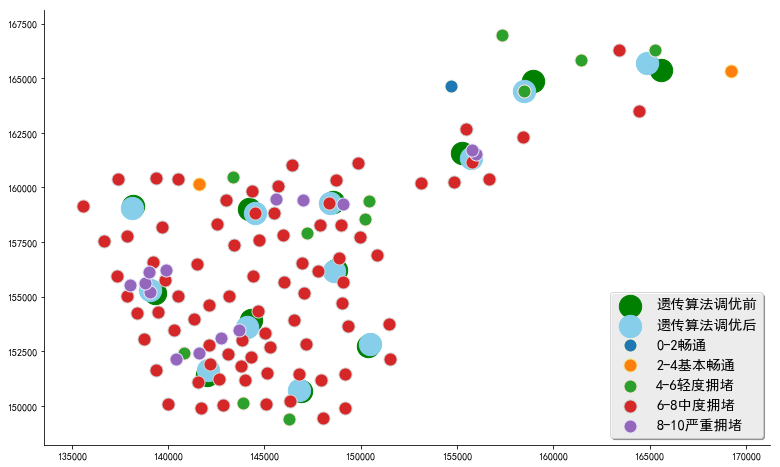

In [35]:
#坐标轴的2维聚类分析
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import mpl  
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
fig=plt.figure(figsize=(13,8))
cm = plt.cm.get_cmap('RdYlBu')

data1=pd.read_excel("./数学建模/数模数据/gg.xlsx",index_col=0)
data_1=pd.read_excel("./数学建模/数模数据/一级节点.xlsx")
data_2=pd.read_excel("./数学建模/数模数据/二级节点.xlsx")
data_3=pd.read_excel("./数学建模/数模数据/工作簿.xlsx",)

x1=data1[data1["离散化"]==1]["x轴"]
y1=data1[data1["离散化"]==1]["y轴"]

x2=data1[data1["离散化"]==2]["x轴"]
y2=data1[data1["离散化"]==2]["y轴"]

x3=data1[data1["离散化"]==3]["x轴"]
y3=data1[data1["离散化"]==3]["y轴"]

x4=data1[data1["离散化"]==4]["x轴"]
y4=data1[data1["离散化"]==4]["y轴"]

x5=data1[data1["离散化"]==5]["x轴"]
y5=data1[data1["离散化"]==5]["y轴"]

ax = plt.gca()
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')

l1=plt.scatter(data_3["x轴"],data_3["y轴"],facecolors='green',edgecolors='green',marker='o',s=500,label="遗传算法调优前")

l2=plt.scatter(data_1["x轴"],data_1["y轴"],facecolors='skyblue',edgecolors='skyblue',marker='o',s=500,label="遗传算法调优后")#一级点

l4=plt.scatter(x1,y1,s=170,alpha=1,edgecolors='beige',label="0-2畅通")#0-2畅通
l5=plt.scatter(x2,y2,s=170,alpha=1,edgecolors='khaki',label="2-4基本畅通")#2-4基本畅通
l6=plt.scatter(x3,y3,s=170,alpha=1,edgecolors='mistyrose',label="4-6轻度拥堵")#4-6轻度拥堵
l7=plt.scatter(x4,y4,s=170,alpha=1,edgecolors='lightgray',label="6-8中度拥堵")#6-8中度拥堵
l8=plt.scatter(x5,y5,s=170,alpha=1,edgecolors='lavender',label="8-10严重拥堵")#8-10严重拥堵

plt.legend(handles=[l1,l2,l4,l5,l6,l7,l8],loc=4,fontsize='x-large',fancybox=True,shadow=True)
#plt.savefig("f:/desktop/区域重新聚类/聚类对比.jpg",dpi=1500)
plt.show()

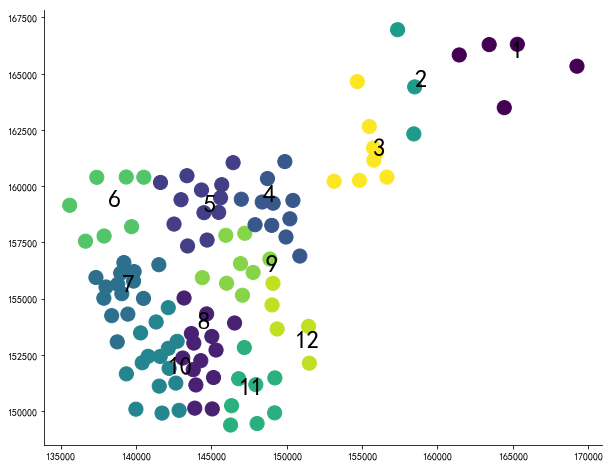

In [38]:
#聚类分析
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=((10,8)))
data5=pd.read_excel("./数学建模/数模数据/所有坐标.xlsx")
xx=pd.concat([data5["x轴"],data5["y轴"]],axis=1) 
cm = plt.cm.get_cmap('RdYlBu')
xx=xx.as_matrix() 
km=KMeans(n_clusters=12)
pred=km.fit_predict(xx)
ax = plt.gca()
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')
plt.scatter(data5["x轴"],data5["y轴"],marker='o',c=pred/1000,s=200)#区域聚类点
for i,j,name in zip(data_1["x轴"],data_1["y轴"],range(1,13)):
    plt.text(i,j,name,rotation=0,fontsize=25,color='k')
#plt.savefig("f:/desktop/jj.jpg",dpi=600)
#l2=plt.scatter(data_1["x轴"],data_1["y轴"],facecolors='r',edgecolors='r',marker='*',s=300,label="一级节点")#一级点

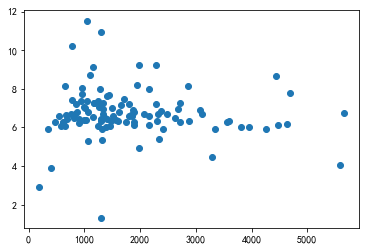

In [40]:
import pandas as pd
import numpy as np
data0=pd.read_excel("./数学建模/数模数据/data_3.xlsx",header=None)
data1=pd.read_excel("./数学建模/数模数据/data_4.xlsx")
data2=data0+data0.T
data2=data2.iloc[1:,1:]
data2=data2.sum(axis=1)[4:]#区域吞吐量
data2.index=range(0,110)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data2,data1['交通拥堵指数'])
#plt.savefig('f:/desktop/货运吞吐量与拥堵系数的关系.jpg',dpi=600)

In [41]:
import pandas as pd
import numpy as np
%matplotlib inline 
quyu=pd.read_excel("./数学建模/数模数据/区域划分1.xlsx",header=None)
data=pd.read_excel("./数学建模/数模数据/货运吞吐量1.xlsx",header=None,index_col=0)
a=[]
b=[]
mm=range(12)
iii=[3,3,7,10,11,6,15,11,7,14,8,3]
iiii=0
#i=len(quyu[m])-9
for m,ii in zip(mm,iii):
    for j in range(ii):
        s=np.sqrt(pow(data.iloc[int(quyu[m][j])-791,2]-data.iloc[int(quyu[m][j+1])-791,2],2)+pow(data.iloc[int(quyu[m][j])-791,3]-data.iloc[int(quyu[m][j+1])-791,3],2))
        a.append(s)
        b.append(data.iloc[int(quyu[m][j])-791,5])
    k=np.sqrt(pow(data.iloc[int(quyu[m][0])-791,3]-data.iloc[int(quyu[m][ii])-791,3],2)+pow(data.iloc[int(quyu[m][0])-791,4]-data.iloc[int(quyu[m][ii])-791,4],2))
    a.append(k)
    b.append(data.iloc[int(quyu[m][j+1])-791,5])
    iiii+=1
    print(str(iiii)+"区域货运吞吐量",sum(b))
    print('两点之间的距离',a)
    print("区域点数",len(a))
    s3=0
    s4=0
    for j in range(ii+1):
        s1=((data.iloc[int(quyu[m][j])-791,4]*data.iloc[int(quyu[m][j])-791,2])/a[j])/(data.iloc[int(quyu[m][j])-791,4]*(ii+1)/a[j])
        s3=s3+s1
        s2=((data.iloc[int(quyu[m][j])-791,4]*data.iloc[int(quyu[m][j])-791,3])/a[j])/(data.iloc[int(quyu[m][j])-791,4]*(ii+1)/a[j])
        s4=s4+s2
    print((s3,s4))
    a.clear()
    b.clear()


1区域货运吞吐量 10837.378
两点之间的距离 [4073.3420519764923, 5901.6743113882612, 2977.0191210168668, 2817.5102772838386]
区域点数 4
(165601.22749999998, 165355.98999999999)
2区域货运吞吐量 14484.662
两点之间的距离 [3278.7396505669835, 2784.0880963072918, 4757.659682039065, 3510.7700062806921]
区域点数 4
(158929.005, 164881.4025)
3区域货运吞吐量 16326.122
两点之间的距离 [4682.1083934910985, 1826.4203174516031, 1309.0096525618123, 413.58547955653171, 279.8324450452547, 3002.0479156902179, 3370.2126751289729, 1999.2056428741716]
区域点数 8
(155287.20374999999, 161568.77625)
4区域货运吞吐量 19758.168
两点之间的距离 [1820.9339320250006, 1107.6051874201291, 2326.3249667447467, 1982.2071821078637, 726.96472521023759, 1318.1901583990089, 3425.9585365412781, 1964.1428298369829, 2386.8867803270391, 3433.1943763789482, 3186.6301506921113]
区域点数 11
(148569.48363636364, 159343.82363636367)
5区域货运吞吐量 13585.755
两点之间的距离 [1319.4397184032257, 2303.2179259679128, 2048.6526186008236, 1627.8352306053803, 1425.2707984800652, 1153.8610684133403, 1780.9304840447992, 4927.92561

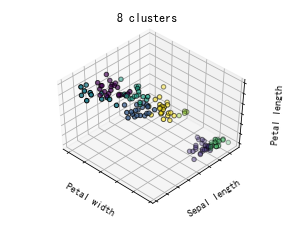

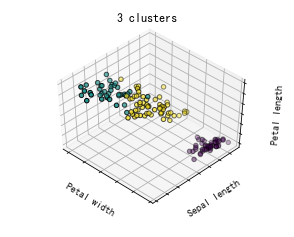

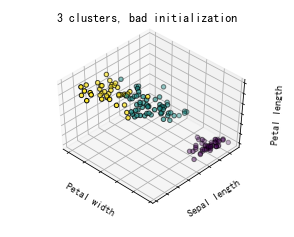

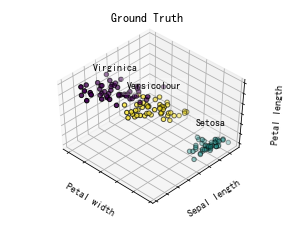

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

In [49]:
zzb=pd.read_excel("./数学建模/数模数据/货运吞吐量1.xlsx",header=None,index_col=0)#所有点的坐标
qyzb=pd.read_excel("./数学建模/数模数据/区域划分2.xlsx")#每个区域内的点坐标
ejjd=pd.read_excel("./数学建模/数模数据/二级节点.xlsx",index_col=0)#每个区域内的2级节点坐标

cc=[0]
kk=[0]
lun=12#区域12
j=(range(1,13))[lun-1]       #"第几个区域,i从1开始"
m=[3,3,4,5,4,2,6,5,4,6,3,3][lun-1] #区域内二级节点数"    
ii=[4,4,8,11,12,7,16,12,8,15,9,4][lun-1]     #"区域内节点数"

for k ,point2 in enumerate(ejjd[ejjd['标志'].values=="区域%d" % j].values):
    for i in list(qyzb.iloc[:ii,j-1]):

        #print(np.sqrt(pow(zzb.iloc[int(i)-791,2]-point2[0],2)+pow(zzb.iloc[int(i)-791,3]-point2[1],2)),"%d点到节点的直线距离" % i)
        distance=np.sqrt(pow(zzb.iloc[int(i)-791,2]-point2[0],2)+pow(zzb.iloc[int(i)-791,3]-point2[1],2))

        #print(distance)
        if distance <=3000 :
            #print(distance)
            print("%d；" % i)
    print("第%d个2级节点" % (k+1))#区域内每个点的x坐标

808；
第1个2级节点
808；
812；
825；
826；
第2个2级节点
808；
812；
825；
826；
第3个2级节点


In [ ]:
利用高效的线性规划第三方库pulp来解决线性规划问题
import csv

import pandas as pd
from pulp import LpProblem, LpMinimize, LpVariable, LpBinary, lpSum, value, LpStatus

gates_df = pd.read_csv('gates.csv', encoding='gbk')
pucks_df = pd.read_csv('input_data.csv', encoding='gbk')
tickets_df = pd.read_csv('tickets.csv', encoding='gbk')

gates_df['st_var'] = gates_df['登机口'].map(lambda x: LpVariable(x, cat=LpBinary))
pucks_df.index = pucks_df['飞机转场记录号']
gates_df.index = gates_df['登机口']
pucks_df = pucks_df.sort_values(by='到达时间')

wn = {'332': 'W', '333': 'W', '33E': 'W', '33H': 'W', '33L': 'W', '773': 'W', '319': 'N', '320': 'N', '321': 'N',
      '323': 'N', '325': 'N', '738': 'N', '73A': 'N', '73E': 'N', '73H': 'N', '73L': 'N'}
conn = []
for _, p_row in pucks_df.iterrows():
    for _, g_row in gates_df.iterrows():
        """匹配登机口和转场记录的到达和出发模型"""
        if p_row['到达类型'] in [v.strip() for v in g_row['到达类型'].split(',')] and p_row['出发类型'] in [v.strip() for v in g_row['出发类型'].split(',')] and wn[
            p_row['飞机型号']] == g_row['机体类别']:
            conn.append(
                {'PK': p_row['飞机转场记录号'], 'ST': g_row['登机口'], 'key': "{}_{}".format(p_row['飞机转场记录号'], g_row['登机口']),
                 'con_var': LpVariable("{}_{}".format(p_row['飞机转场记录号'], g_row['登机口']), cat=LpBinary)})
conn_df = pd.DataFrame(conn)
conn_df.index = conn_df['key']


def opt(num):
    print("*********{}************".format(num))
    prob = LpProblem("The coal opt", LpMinimize)
    print("***opt")
    """目标函数：求解最小值，登机口数减去转场记录数"""
    prob += lpSum(gates_df['st_var'])-lpSum(conn_df['con_var'])
    print("***st1")
    """限制条件1"""

    for _, row in conn_df.iterrows():
        prob += row['con_var'] <= gates_df['st_var'][row['ST']], "st1/2/{}_{}".format(row['PK'], row['ST'])

    print("***st2")
    """限制条件2"""
    for pk in pucks_df['飞机转场记录号']:
        prob += lpSum(conn_df[conn_df['PK'] == pk]['con_var']) <= 1, "st2/{}".format(pk)

    print("***st3")
    """限制条件3"""
    prob += lpSum(conn_df['con_var']) <=303, "st3"

    print("***st4")
    """限制条件4"""
    for ST in gates_df['登机口']:
        print(ST)
        pks = list(conn_df[conn_df['ST'] == ST]['PK'])
        for i in range(1, len(pucks_df)):
            if pucks_df.iloc[i]['飞机转场记录号'] not in pks:
                continue
            conn1 = conn_df['con_var']["{}_{}".format(pucks_df.iloc[i]['飞机转场记录号'], ST)]
            for j in range(0, i):
                if pucks_df.iloc[j]['飞机转场记录号'] not in pks:
                    continue
                if pucks_df.iloc[i]['到达时间'] - pucks_df.iloc[j]['出发时间'] < 45 * 60:
                    conn2 = conn_df['con_var']["{}_{}".format(pucks_df.iloc[j]['飞机转场记录号'], ST)]
                    prob += conn1 + conn2 <= gates_df['st_var'][ST], "st4/{}/{}_{}".format(ST, pucks_df.iloc[i]['飞机转场记录号'],
                                                                                           pucks_df.iloc[j]['飞机转场记录号'])
    prob.writeLP("res/test_{}.lp".format(num))
    print("开始优化")
    prob.solve()
    status = str(LpStatus[prob.status])
    print("Status:", LpStatus[prob.status])
    print("正将优化结果写入文件。")

    def pre_data_write(prob):
        def write_res(res):
            with open('res/result_{}_{}.csv'.format(num, status), 'w', newline='') as f1:
                writer = csv.writer(f1)
                writer.writerows(res)

        res = []
        for v in prob.variables():
            # print(str(v.name) + " = " + str(v.varValue))
            if v.varValue is None:
                print(str(v.name) + " = " + str(v.varValue))
            if v.varValue is not None and int(v.varValue) > 1:
                print(str(v.name) + " ================== " + str(v.varValue))

            # if v.varValue is not None and int(v.varValue) > 0:
            res.append([str(v.name), str(v.varValue)])
        write_res(res)

    pre_data_write(prob)
    print("Total Cost of Transportation = ", value(prob.objective))


opt('question1')
